In [1]:
import random

import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

from library.A_data_collection import make_dataset_for_regression
from library.D_data_analysis import regression
from library.E_plot_results import plot
from library.my_functions import pollute_data_mcar, zoomed_plot, zoom_data

SEED = 2023
random.seed(SEED)
np.random.seed(SEED)

In [2]:
#from google.colab import drive
#drive.mount('/gdrive')
#%cd '/gdrive/MyDrive/DIQ_Project_I+B/'

# Completeness and Distinctness Issues in Regression

N.B For each DQ issue you are requested to generate 10 different experiments
1 experiment correspond to the generation of a plot/with related tables.
For 1 experiment, the DQ issue assigned to your Group/you must be injected in your data with a different %.
Following, detailed guidelines on which are the expected results for each assigned DQ issue:

Completeness
— consider both Missing Not at Random (MNAR) and Missing Completely at Random (MCAR) missing
value distributions
— 10 experiments with a different distribution of missing values: for example, you can distribute the missing
values uniformly across all columns, or change the percentage of missing values for columns with different
informativeness (changing the default parameter in the data collection). Try to think of a way to simulate
also MNAR distributions!
— For one experiment: varying % of missing values, for example from 5% to 50% (with an increasing step
of 5%) of injected missing values

Distinctness
— 10 experiments with a different number of polluted features: for example, substituting/polluting a different
number of the original features, or adding more and more features
— For one experiment: varying % of distinctness, from very low distinctness (all values constant) to very
high (all unique values)
— You can also try to combine low-distinctness and high-distinctness columns in some experiments


Data Preparation is requested for: Completeness
Select one/more data preparation techniques that we have seen at exercise lectures and implement it/them inside the pipeline.
For Completeness apply Data Imputation.

# List of algorithms for regression

In [3]:
REGRESSION_ALGORITHMS = [
    "LinearRegressor", "BayesianRidge", "GPRegressor", "SVMRegressor", "KNNRegressor",
    "MLPRegressor"
]

SEED = 2023

In [4]:
if __name__ == '__main__':
    print("Starting the script...")

    # A: DATA COLLECTION
    X, y = make_dataset_for_regression(
        n_samples=1000, n_features=3, n_informative=3, n_targets=1, bias=0.0,
        effective_rank=None, tail_strength=0.5, noise=0.0, seed=2023
    )

    X_df = pd.DataFrame(X)

    # B: DATA POLLUTION
    # YOUR POLLUTION FUNCTION (on the generated datasets)
    # Can insert DQ issues with certain percentages (can create a mask of T and F values of the same length of the dataframe X in order to use the loc function and localize the rows in which to perform some actions). This mask can be generated with the random function of python (random seed) used to match the dataframe and substitute the value.
    pollute_data_mcar(X_df)

    # D: DATA ANALYSIS
    #for algorithm in REGRESSION_ALGORITHMS:
    #results_2_analysis = regression(X, y, algorithm, SEED)

    # C: DATA PREPARATION (IF REQUESTED, IT DEPENDS ON THE DQ ISSUE)
    # YOUR DATA PREPARATION FUNCTION (to apply on the generated datasets)
    # For Completeness apply Data Imputation in the Data Preparation phase - try different imputation techniques (ffill, bfill, mean, median, ML methods)

    # D: DATA ANALYSIS ON THE CLEANED DATASETS (re-compute the data analysis evaluation on prepared dataset)
    #for algorithm in REGRESSION_ALGORITHMS:
    #results_2_analysis = classification(X, y, algorithm, SEED):
    #results_2_analysis = regression(X, y, algorithm, SEED)
    #results_2_analysis = clustering(X, algorithm, n_clusters, SEED)

    # E: PLOT RESULTS
    # RESULTS EVALUATION
    # ADD TABLES WITH THE RESULTS FOR THE REPORT!

Starting the script...


# Regression example

In [5]:
# An example of one experiment, but we have to generate 10 different experiments (can change a parameter between experiments, with different setup of the data pollution function)
# (in this toy example, I simply created 10 datasets with respectively 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009 number of samples and I generated the three plots for the evaluation of the results)

X_AXIS = [n * 0.05 for n in range(1, 11)]

RESULTS_PER_ALGORITHM = []

for algorithm in REGRESSION_ALGORITHMS:
    RESULTS_ALGORITHM = []

    for i in range(len(X_AXIS)):
        # SECOND CYCLE ON THE NUMBER OF POLLUTED DATASET THAT YOU WANT TO CREATE WITH DIFFERENT % OF POLLUTION
        # DATA COLLECTION - creating 10 datasets with an increase in the samples
        X, y = make_dataset_for_regression(
            n_samples=1000, n_features=3, n_informative=3, n_targets=1,
            bias=0.0, effective_rank=None, tail_strength=0.5, noise=0.0, seed=2023
        )

        X = pd.DataFrame(X)

        pollute_data_mcar(X, percent_incomplete=X_AXIS[i])

        # DATA ANALYSIS
        RESULTS_ALGORITHM.append(regression(X, y, algorithm, SEED))

    RESULTS_PER_ALGORITHM.append(RESULTS_ALGORITHM)

Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for GPRegressor...
Training for GPRegressor...
Training for GPRegressor...
Training for GPRegressor...
Training for GPRegressor...
Training for GPRegressor...
Training for GPRegressor...
Training for GPRegressor...
Training for GPRegressor...
Training for GPRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for 

# Results evaluation

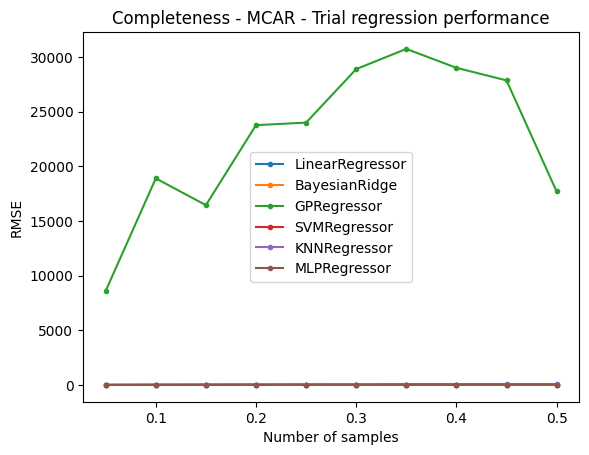

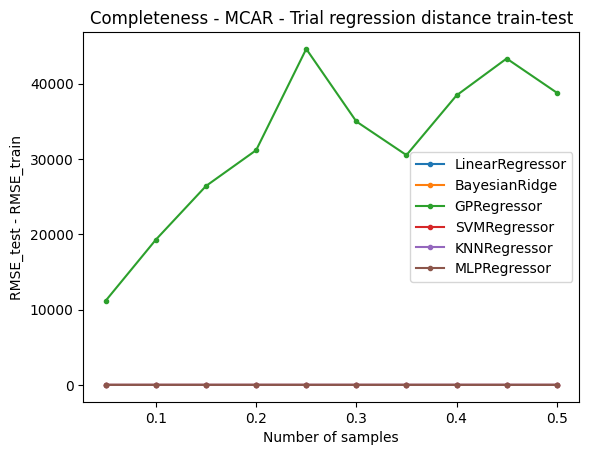

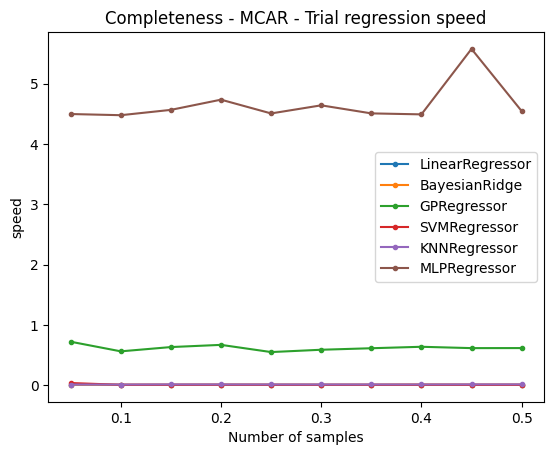

In [6]:
# EXAMPLE FOR USING THE SCRIPTS TO PLOT THE RESULTS - x_axis for the data quality issue, while the y_axis is the performance measure
# Injecting a high amount of issues in the dataset, the model will learn on that errors, so it will have a performance value really far from the one of the test set
X_LABEL = "Number of samples"
DESCRIPTION = 'Completeness - MCAR - Trial regression '

plot(
    x_axis_values=X_AXIS, x_label=X_LABEL, results=RESULTS_PER_ALGORITHM,
    title=DESCRIPTION + "performance", algorithms=REGRESSION_ALGORITHMS, plot_type="performance"
)

plot(
    x_axis_values=X_AXIS, x_label=X_LABEL, results=RESULTS_PER_ALGORITHM,
    title=DESCRIPTION + "distance train-test", algorithms=REGRESSION_ALGORITHMS, plot_type="distance train-test"
)

plot(
    x_axis_values=X_AXIS, x_label=X_LABEL, results=RESULTS_PER_ALGORITHM,
    title=DESCRIPTION + "speed", algorithms=REGRESSION_ALGORITHMS, plot_type="speed"
)

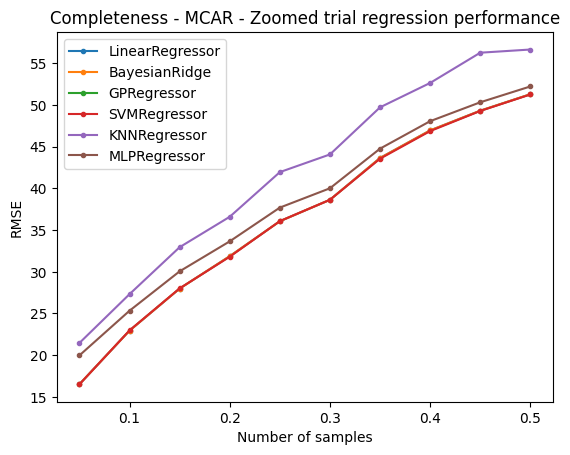

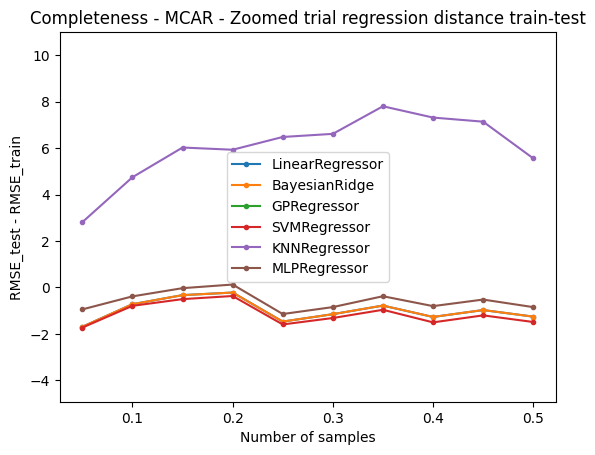

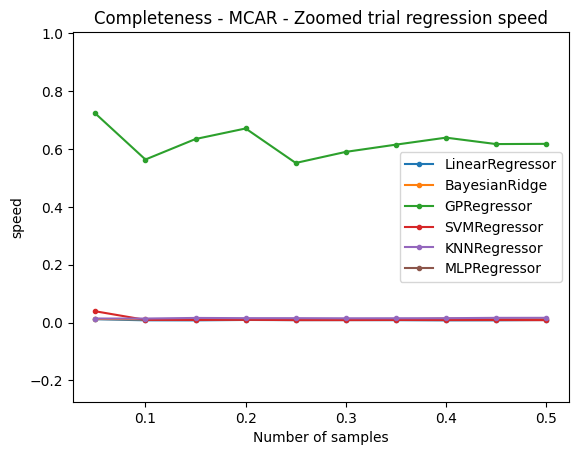

In [7]:
DESCRIPTION = 'Completeness - MCAR - Zoomed trial regression '

zoomed_plot(
    zoom=zoom_data(RESULTS_PER_ALGORITHM, 'mean_perf'), x_axis_values=X_AXIS, x_label=X_LABEL,
    results=RESULTS_PER_ALGORITHM, title=DESCRIPTION + "performance", algorithms=REGRESSION_ALGORITHMS,
    plot_type="performance"
)

zoomed_plot(
    zoom=zoom_data(RESULTS_PER_ALGORITHM, 'distance'), x_axis_values=X_AXIS, x_label=X_LABEL,
    results=RESULTS_PER_ALGORITHM, title=DESCRIPTION + "distance train-test", algorithms=REGRESSION_ALGORITHMS,
    plot_type="distance train-test"
)

zoomed_plot(
    zoom=zoom_data(RESULTS_PER_ALGORITHM, 'speed'), x_axis_values=X_AXIS, x_label=X_LABEL,
    results=RESULTS_PER_ALGORITHM, title=DESCRIPTION + "speed", algorithms=REGRESSION_ALGORITHMS,
    plot_type="speed"
)

## Data Preparation

In [8]:
SI = SimpleImputer(missing_values=np.NaN, strategy="median")  # as fillna - mean

# TODO: Define another dataset in which we use SI to impute the null values

In [9]:
RESULTS_PER_ALGORITHM = []

for algorithm in REGRESSION_ALGORITHMS:  # FIRST CYCLE ON THE ALGORITHMS
    RESULTS_ALGORITHM = []

    for i in range(len(X_AXIS)):
        X, y = make_dataset_for_regression(
            n_samples=1000, n_features=3, n_informative=3, n_targets=1, bias=0.0,
            effective_rank=None, tail_strength=0.5, noise=0.0, seed=2023
        )
        X = pd.DataFrame(X)

        pollute_data_mcar(X, percent_incomplete=X_AXIS[i])

        X_CLEAN = SI.fit_transform(X)

        # DATA ANALYSIS
        RESULTS_ALGORITHM.append(regression(X_CLEAN, y, algorithm, SEED))

    RESULTS_PER_ALGORITHM.append(RESULTS_ALGORITHM)

Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for LinearRegressor...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for BayesianRidge...
Training for GPRegressor...
Training for GPRegressor...
Training for GPRegressor...
Training for GPRegressor...
Training for GPRegressor...
Training for GPRegressor...
Training for GPRegressor...
Training for GPRegressor...
Training for GPRegressor...
Training for GPRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for SVMRegressor...
Training for 

## Results Evaluation

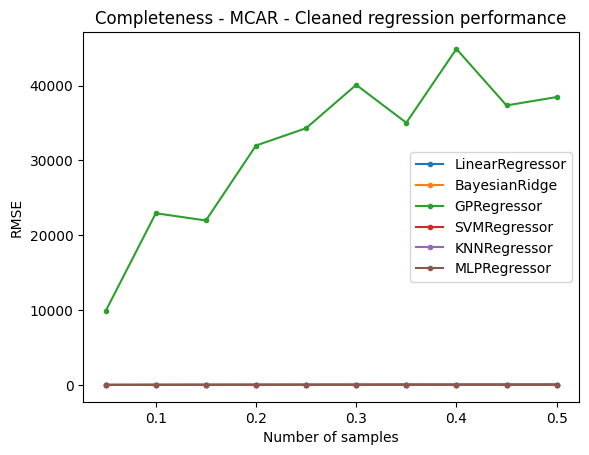

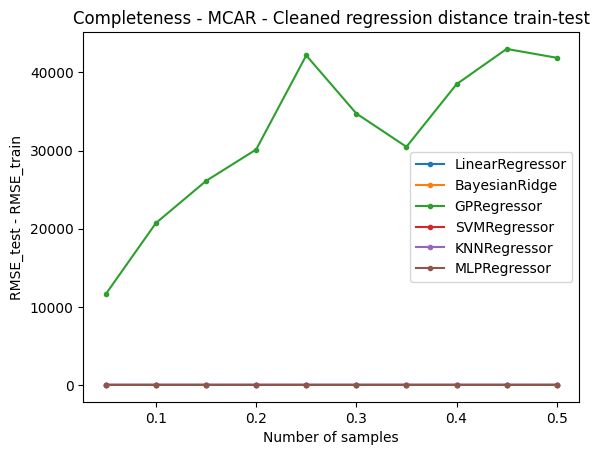

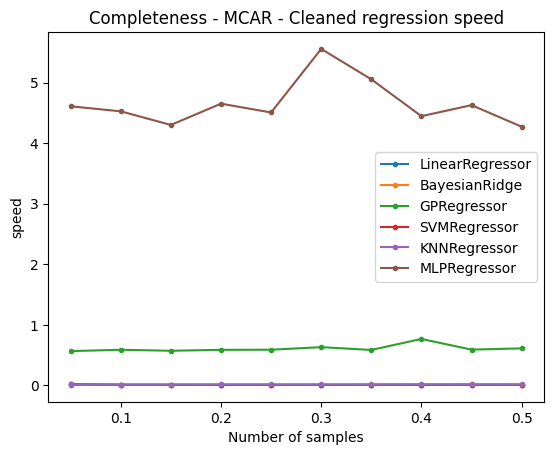

In [10]:
DESCRIPTION = 'Completeness - MCAR - Cleaned regression '

plot(
    x_axis_values=X_AXIS, x_label=X_LABEL, results=RESULTS_PER_ALGORITHM, title=DESCRIPTION + "performance",
    algorithms=REGRESSION_ALGORITHMS, plot_type="performance"
)

plot(
    x_axis_values=X_AXIS, x_label=X_LABEL, results=RESULTS_PER_ALGORITHM, title=DESCRIPTION + "distance train-test",
    algorithms=REGRESSION_ALGORITHMS, plot_type="distance train-test"
)

plot(
    x_axis_values=X_AXIS, x_label=X_LABEL, results=RESULTS_PER_ALGORITHM, title=DESCRIPTION + "speed",
    algorithms=REGRESSION_ALGORITHMS, plot_type="speed"
)

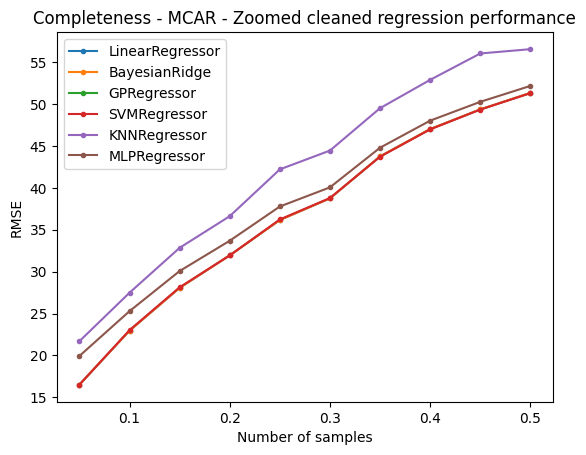

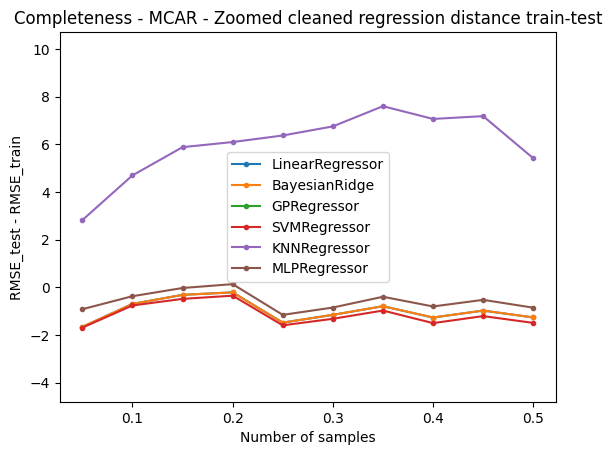

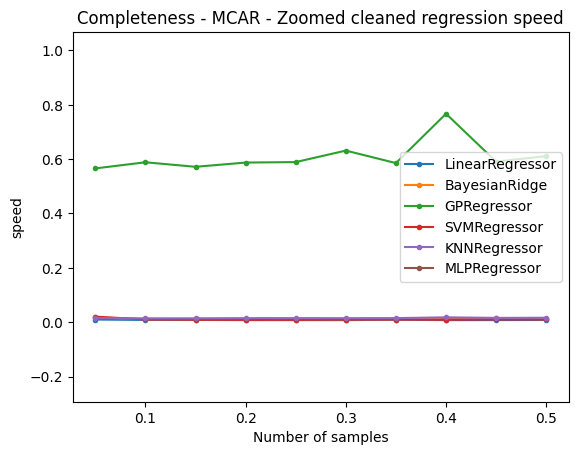

In [11]:
DESCRIPTION = 'Completeness - MCAR - Zoomed cleaned regression '

zoomed_plot(
    zoom=zoom_data(RESULTS_PER_ALGORITHM, 'mean_perf'), x_axis_values=X_AXIS, x_label=X_LABEL,
    results=RESULTS_PER_ALGORITHM, title=DESCRIPTION + "performance", algorithms=REGRESSION_ALGORITHMS,
    plot_type="performance"
)

zoomed_plot(
    zoom=zoom_data(RESULTS_PER_ALGORITHM, 'distance'), x_axis_values=X_AXIS, x_label=X_LABEL,
    results=RESULTS_PER_ALGORITHM, title=DESCRIPTION + "distance train-test", algorithms=REGRESSION_ALGORITHMS,
    plot_type="distance train-test"
)

zoomed_plot(
    zoom=zoom_data(RESULTS_PER_ALGORITHM, 'speed'), x_axis_values=X_AXIS, x_label=X_LABEL,
    results=RESULTS_PER_ALGORITHM, title=DESCRIPTION + "speed", algorithms=REGRESSION_ALGORITHMS,
    plot_type="speed"
)